
# Task 6.4: Supervised Machine Learning



## This Notebook contains the following Steps;

### Step 1. Importing Libraries and Data
### Step 2. Data Quality Checks
### Step 3. Regression Analysis Data Prep
### Step 4. Regression Analysis

   <b> Testing the Hypothesis:</b> More male leads in bike’s rental than Female


### Step 5. The Conclusion

### Step 6. Data Export




## Step 1: Importing Data and Libraries


In [1]:
#Step 1.1: Importing Necessary Libraries; 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#This command propts matplotlib visuals to appear in the notebook;

%matplotlib inline

In [3]:
#Step 1.2: Creating a Folderpath for Citibike_Final Dataset; 

path ='/users/ibu/Documents/Bike Rental Analysis'

In [4]:
#Step 1.3: Importing 'Citibike_Final' Dataset from 'Prepared' Data Folder;

df_NYBikes = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'Citibike_T63.csv'), index_col = False)

In [5]:
#Step 1.4: Checking Shape & Dimension; 

df_NYBikes.shape

(50000, 18)

In [6]:
#Step 1.5: Checking Shape & Dimension; 

df_NYBikes.head()

,Unnamed: 0,Bike_ID,Weekday,Start_Hour,Start_Time,Start_Station_ID,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Time,End_Station_ID,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Trip_Duration,Member_Status,Gender,Distance
0,0,16013,Mon,18,9/9/13 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/13 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,Female,High_Latitude
1,1,15230,Thu,18,9/12/13 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/13 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,Male,Mid_Latitude
2,2,17942,Wed,19,9/18/13 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/13 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,Male,High_Latitude
3,3,19683,Sat,11,9/28/13 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/13 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,Female,High_Latitude
4,4,18024,Sat,18,9/7/13 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/13 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,Unknown,High_Latitude



## Step 2: Data Quality Checks


In [7]:
#Step 2.1: Checking Columns; 

df_NYBikes.columns

Index(['Unnamed: 0', 'Bike_ID', 'Weekday', 'Start_Hour', 'Start_Time',
       'Start_Station_ID', 'Start_Station_Name', 'Start_Station_Latitude',
       'Start_Station_Longitude', 'End_Time', 'End_Station_ID',
       'End_Station_Name', 'End_Station_Latitude', 'End_Station_Longitude',
       'Trip_Duration', 'Member_Status', 'Gender', 'Distance'],
      dtype='object')

In [8]:
#Step 2.2: Dropping Unnecessary Columns; 

df_NYBikes = df_NYBikes.drop(columns = ['Unnamed: 0'])

In [9]:
#Step 2.3: Querying Dataset Info; 

df_NYBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bike_ID                  50000 non-null  int64  
 1   Weekday                  50000 non-null  object 
 2   Start_Hour               50000 non-null  int64  
 3   Start_Time               50000 non-null  object 
 4   Start_Station_ID         50000 non-null  int64  
 5   Start_Station_Name       50000 non-null  object 
 6   Start_Station_Latitude   50000 non-null  float64
 7   Start_Station_Longitude  50000 non-null  float64
 8   End_Time                 50000 non-null  object 
 9   End_Station_ID           50000 non-null  int64  
 10  End_Station_Name         50000 non-null  object 
 11  End_Station_Latitude     50000 non-null  float64
 12  End_Station_Longitude    50000 non-null  float64
 13  Trip_Duration            50000 non-null  int64  
 14  Member_Status         

In [10]:
#Step 2.4: Confirming Dataframe Shape; 

df_NYBikes.shape

(50000, 17)

In [11]:
#Step 2.5: Checking for Missing Values; 

df_NYBikes.isnull().sum()

Bike_ID                    0
Weekday                    0
Start_Hour                 0
Start_Time                 0
Start_Station_ID           0
Start_Station_Name         0
Start_Station_Latitude     0
Start_Station_Longitude    0
End_Time                   0
End_Station_ID             0
End_Station_Name           0
End_Station_Latitude       0
End_Station_Longitude      0
Trip_Duration              0
Member_Status              0
Gender                     0
Distance                   0
dtype: int64

<b> No missing values found

In [12]:
#Step 2.6: Checking for Duplicates; 

NYBikes_Dups = df_NYBikes.duplicated()

In [13]:
NYBikes_Dups.shape

(50000,)

<b> No Duplicates Found. 

/Users/ibu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trip_Duration', ylabel='Density'>

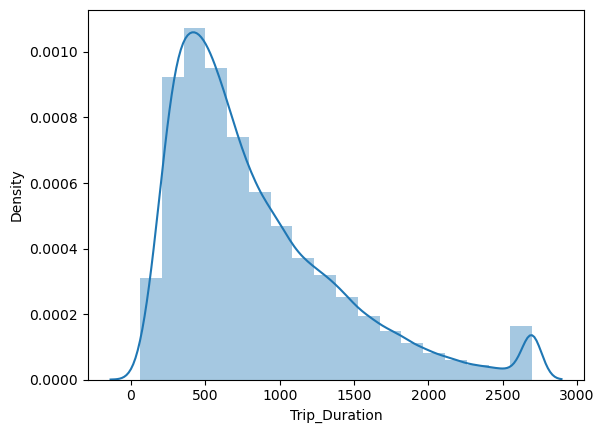

In [14]:
#Step 2.7a: Checking for Extreme Values;

sns.distplot(df_NYBikes['Trip_Duration'],bins = 18, kde = True)

/Users/ibu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Hour', ylabel='Density'>

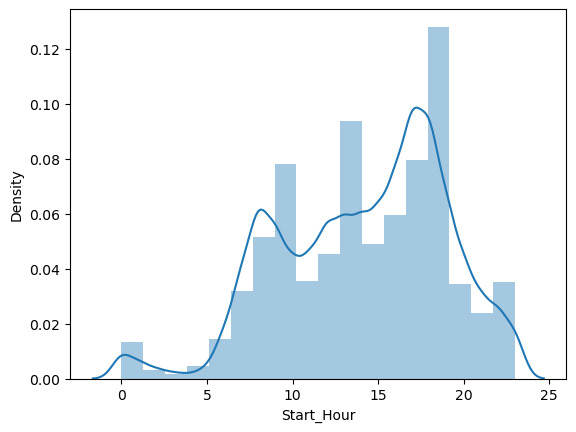

In [15]:
#Step 2.7b: Checking for Extreme Values;

sns.distplot(df_NYBikes['Start_Hour'],bins = 18, kde = True)

In [16]:
df_NYBikes.describe()

,Bike_ID,Start_Hour,Start_Station_ID,Start_Station_Latitude,Start_Station_Longitude,End_Station_ID,End_Station_Latitude,End_Station_Longitude,Trip_Duration
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,17615.269360,14.145240,443.321500,40.734170,-73.991109,442.539700,40.733859,-73.991351,838.982900
std,1675.407446,4.860541,356.559925,0.019911,0.012555,355.756022,0.019885,0.012569,573.663997
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000



## Step 3: Regression Analysis Data Prep


In [17]:
#Step 3.1: Converting Columns: 'Start_Time' & 'End_time' to Datetime Format; 

df_NYBikes['Start_Time']=pd.to_datetime(df_NYBikes['Start_Time'])

df_NYBikes['End_time']=pd.to_datetime(df_NYBikes['End_Time'])

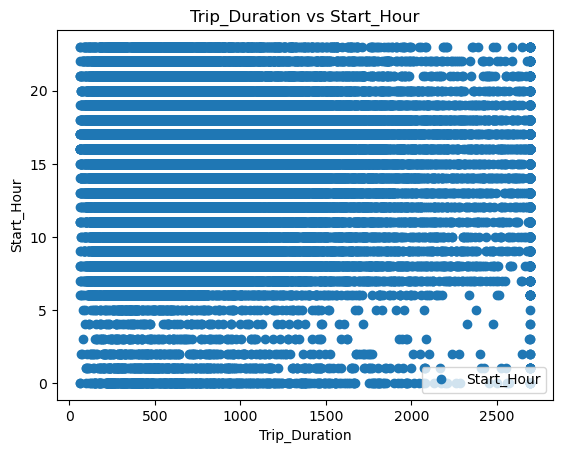

In [18]:
#Step 3.2: Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other;

df_NYBikes.plot(x = 'Trip_Duration', y='Start_Hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip_Duration vs Start_Hour')  
plt.xlabel('Trip_Duration')  
plt.ylabel('Start_Hour')  
plt.show()

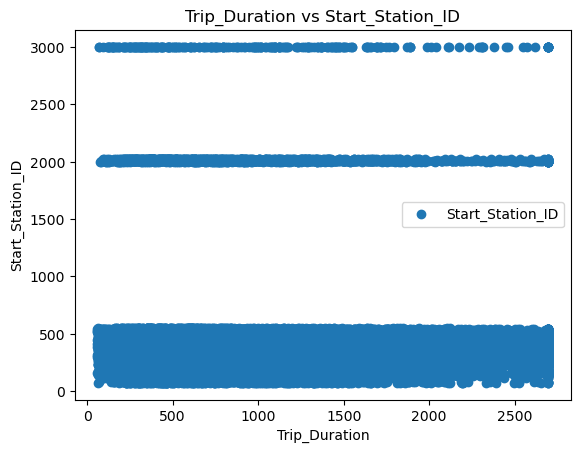

In [19]:
#Step 3.2b: Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other;

df_NYBikes.plot(x = 'Trip_Duration', y='Start_Station_ID',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip_Duration vs Start_Station_ID')  
plt.xlabel('Trip_Duration')  
plt.ylabel('Start_Station_ID')  
plt.show()

In [20]:
#Step 3.3: Reshaping Variables into NumPy Arrays and put them into Separate Objects;

x = df_NYBikes['Trip_Duration'].values.reshape(-1,1)

y = df_NYBikes['Start_Hour'].values.reshape(-1,1)

In [21]:
x

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]])

In [22]:
y

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]])

In [23]:
#Step 3.4: Splitting Data into a Training Set and Test Set;

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)


## Step 4: Regression Analysis

   <b> Testing the Hypothesis:</b> More male leads in bike’s rental than Female


In [24]:
#Step 4.1: Creating a Regression Object;

Regression = LinearRegression()

In [25]:
#Step 4.2: Fit the Regression Object onto the Training Set;

Regression.fit(x_train, y_train)

LinearRegression()

In [26]:
#Step 4.3: Predicting the Values of y using x;

y_predicted = Regression.predict(x_test)

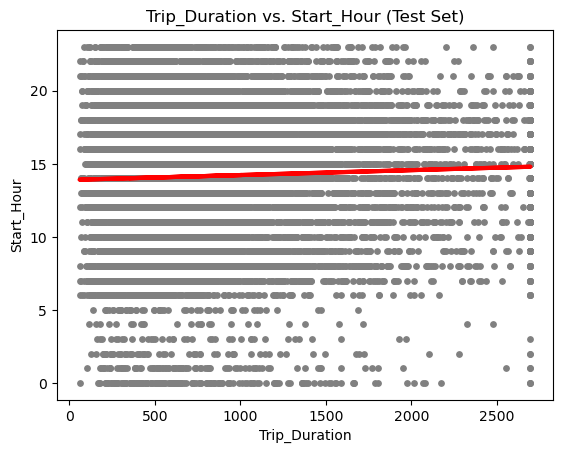

In [27]:
#Step 4.4: Creating a Plot Showing the Regression Line from Test Set Model;

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trip_Duration vs. Start_Hour (Test Set)')
plot_test.xlabel('Trip_Duration')
plot_test.ylabel('Start_Hour')
plot_test.show()

In [28]:
#Step 4.5: Creating Objects that Contain the Model Summary Statistics;

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
#Step 4.6: Printing Model's Summary Statistics: This is where you evaluate the performance of the model;

print('Slope:' , Regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00033541]]
Mean squared error:  23.66943935679213
R2 score:  0.0017274221535059642


In [30]:
#Step 4.7: Creating a Dataframe Comparing the Actual and Predicted Values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

data.head(30)

,Actual,Predicted
0,19,14.004843
1,20,14.429469
2,19,14.265454
3,16,14.138335
4,0,13.986731
5,18,14.108819
6,8,13.994780
7,15,14.254721
8,16,13.955538
9,17,13.970966


<b> I see a weird data fitness and the r value shows weak relationship of sort. Maybe start hour has no baring on trip duration or rental duration. 

## Step 5: The Conclusion

### Results not as expected as the data outcome seems unfit. We have noticed a weak relationship between Trip Duration and Start Hour from the r-value which is nearly zero (0). Maybe start hour has no baring on trip duration or rental duration or more info-data is needed to predict better. 

## Step 6: Data Export

In [ ]:
#Step 6.1: Exporting Updated 'NYBikes' Dataset;

df_NYBikes.to_csv(os.path.join(path, '02 Data', 'Prepared', 'NYBikes_T64.csv'))